In [ ]:
import torch
import torchvision



In [ ]:
torch.__version__

'1.9.0+cu111'

In [ ]:
torchvision.__version__


'0.10.0+cu111'

In [ ]:
torch.cuda.is_available()


False

In [ ]:
torch.cuda.device_count()


0

In [ ]:
#Define a tensor with a default data type
x = torch.ones(2,2)
print(x)
print(x.dtype)

tensor([[1., 1.],
        [1., 1.]])
torch.float32


In [ ]:
#Specify the data type when defining a tensor:
x = torch.ones(2,2, dtype = torch.int8)
print(x)
print(x.dtype)

tensor([[1, 1],
        [1, 1]], dtype=torch.int8)
torch.int8


In [ ]:
#Define a tensor:
x = torch.rand(2,2)
print(x)
print(x.dtype)

tensor([[0.6020, 0.2428],
        [0.5344, 0.7988]])
torch.float32


In [ ]:
#Convert the tensor into a NumPy array:
y = x.numpy()
print(y)
print(y.dtype)


[[0.6020275  0.24280524]
 [0.5343902  0.7987875 ]]
float32


In [ ]:
#Converting NumPy arrays into tensors
#define numpy array

import numpy as np
x=np.zeros((2,2),dtype=np.float32)
print(x)
print(x.dtype)

[[0. 0.]
 [0. 0.]]
float32


In [ ]:
#Convert the NumPy array into a PyTorch tensor:
y=torch.from_numpy(x)
print(y)
print(y.dtype)


tensor([[0., 0.],
        [0., 0.]])
torch.float32


In [ ]:
#Loading a dataset
#First, we will load the MNIST training dataset:
from torchvision import datasets
# path to store data and/or load from
path2data="./data"
# loading training data
train_data=datasets.MNIST(path2data, train=True, download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
#Then, we will extract the input data and target labels:
# extract data and targets for training
x_train, y_train=train_data.data,train_data.targets
print(x_train.shape)
print(y_train.shape)

torch.Size([60000, 28, 28])
torch.Size([60000])


In [ ]:
#Next, we will load the MNIST test dataset:
# loading validation data
val_data=datasets.MNIST(path2data, train=False, download=True)

In [ ]:
#Then, we will extract the input data and target labels:
# extract data and targets for testing
x_val,y_val=val_data.data, val_data.targets
print(x_val.shape)
print(y_val.shape)


torch.Size([10000, 28, 28])
torch.Size([10000])


In [ ]:
#After that, we will add a new dimension to the tensors:
# add a dimension to tensor to become B*C*H*W
if len(x_train.shape)==3:
 x_train=x_train.unsqueeze(1)
print(x_train.shape)
if len(x_val.shape)==3:
 x_val=x_val.unsqueeze(1)
print(x_val.shape)


torch.Size([60000, 1, 28, 28])
torch.Size([10000, 1, 28, 28])


In [ ]:
#Now, let's display a few sample images.
#Next, we will import the required packages:
from torchvision import utils
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [ ]:
#Then, we will define a helper function to display tensors as images:
def show(img):
 # convert tensor to numpy array
 npimg = img.numpy()
 # Convert to H*W*C shape
 npimg_tr=np.transpose(npimg, (1,2,0))
 plt.imshow(npimg_tr,interpolation='nearest')

torch.Size([3, 152, 242])


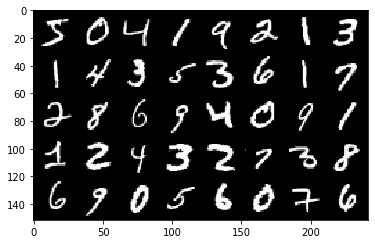

In [ ]:
# make a grid of 40 images, 8 images per row
x_grid=utils.make_grid(x_train[:40], nrow=8, padding=2)
print(x_grid.shape)
# call helper function
show(x_grid)

In [ ]:
#Data transformation
#Let's define a transform class in order to apply some image transformations on the MNIST dataset:
from torchvision import transforms
# loading MNIST training dataset
train_data=datasets.MNIST(path2data, train=True, download=True)
# define transformations
data_transform = transforms.Compose([
 transforms.RandomHorizontalFlip(p=1),
 transforms.RandomVerticalFlip(p=1),
 transforms.ToTensor(),
 ])

Text(0.5, 1.0, 'transformed')

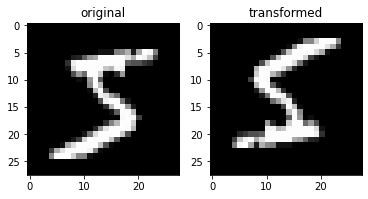

In [ ]:
#Let's apply the transformations on an image from the MNIST dataset:
# get a sample image from training dataset
img = train_data[0][0]
# transform sample image
img_tr=data_transform(img)
# convert tensor to numpy array
img_tr_np=img_tr.numpy()

# show original and transformed images
plt.subplot(1,2,1)
plt.imshow(img,cmap="gray")
plt.title("original")
plt.subplot(1,2,2)
plt.imshow(img_tr_np[0],cmap="gray");
plt.title("transformed")

In [ ]:
#We can also pass the transformer function to the dataset class:
# define transformations
data_transform = transforms.Compose([
 transforms.RandomHorizontalFlip(1),
 transforms.RandomVerticalFlip(1),
 transforms.ToTensor(),
 ])
# Loading MNIST training data with on-the-fly transformations
train_data=datasets.MNIST(path2data, train=True, download=True,
transform=data_transform )

In [ ]:
#Wrapping tensors into a dataset
#Let's create a PyTorch dataset by wrapping x_train and y_train :
from torch.utils.data import TensorDataset
# wrap tensors into a dataset
train_ds = TensorDataset(x_train, y_train)
val_ds = TensorDataset(x_val, y_val)
for x,y in train_ds:
 print(x.shape,y.item())
 break

torch.Size([1, 28, 28]) 5


In [ ]:
#Creating data loaders
#Let's create two data loaders for the training and validation datasets:
from torch.utils.data import DataLoader
# create a data loader from dataset
train_dl = DataLoader(train_ds, batch_size=8)
val_dl = DataLoader(val_ds, batch_size=8)
# iterate over batches
for xb,yb in train_dl:
 print(xb.shape)
 print(yb.shape)
 break


torch.Size([8, 1, 28, 28])
torch.Size([8])


In [ ]:
#Building models
#Defining a linear layer
from torch import nn
# input tensor dimension 64*1000
input_tensor = torch.randn(64, 1000)
# linear layer with 1000 inputs and 100 outputs
linear_layer = nn.Linear(1000, 100)
# output of the linear layer
output = linear_layer(input_tensor)
print(output.size())


torch.Size([64, 100])


In [ ]:
#Defining models using nn.Sequential
from torch import nn
# define a two-layer model
model = nn.Sequential(
 nn.Linear(4, 5),
 nn.ReLU(),
 nn.Linear(5, 1),
)
print(model)


Sequential(
  (0): Linear(in_features=4, out_features=5, bias=True)
  (1): ReLU()
  (2): Linear(in_features=5, out_features=1, bias=True)
)


In [ ]:
#Defining models using nn.Module
#First, we will implement the bulk of the class:
import torch.nn.functional as F
class Net(nn.Module):
 def __init__(self):
  super(Net, self).__init__()
 def forward(self, x):
  pass

In [ ]:
def __init__(self):
 super(Net, self).__init__()
 self.conv1 = nn.Conv2d(1, 20, 5, 1)
 self.conv2 = nn.Conv2d(20, 50, 5, 1)
 self.fc1 = nn.Linear(4*4*50, 500)
 self.fc2 = nn.Linear(500, 10)

In [ ]:
def forward(self, x):
 x = F.relu(self.conv1(x))
 x = F.max_pool2d(x, 2, 2)
 x = F.relu(self.conv2(x))
 x = F.max_pool2d(x, 2, 2)
 x = x.view(-1, 4*4*50)
 x = F.relu(self.fc1(x))
 x = self.fc2(x)
 return F.log_softmax(x, dim=1)


In [ ]:
#Then, we will override both class functions, __init__ and forward:
Net.__init__ = __init__
Net.forward = forward

In [ ]:
model = Net()
print(model)

Net(
  (conv1): Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(20, 50, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=800, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=10, bias=True)
)


In [ ]:
from torchsummary import summary
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 20, 24, 24]             520
            Conv2d-2             [-1, 50, 8, 8]          25,050
            Linear-3                  [-1, 500]         400,500
            Linear-4                   [-1, 10]           5,010
Total params: 431,080
Trainable params: 431,080
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.12
Params size (MB): 1.64
Estimated Total Size (MB): 1.76
----------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [ ]:
# define the negative log likelihood loss
loss_func = nn.NLLLoss(reduction="sum")

for xb, yb in train_dl:
    # move batch to cuda device
    xb=xb.type(torch.float)
    yb=yb
    # get model output
    out=model(xb)
    # calculate loss value
    loss = loss_func(out, yb)
    print (loss.item())
    break

0.0004792800173163414


In [ ]:
# compute gradients
loss.backward()


In [ ]:
#defining optimizer
#Let's define the Adam optimizer:
from torch import optim

# define Adam optimizer
opt = optim.Adam(model.parameters(), lr=1e-4)

# update model parameters
opt.step()

# set gradients to zero
opt.zero_grad()

In [ ]:
#training and validation
import numpy as np

def metrics_batch(target, output):
    # obtain output class
    pred = output.argmax(dim=1, keepdim=True)
    
    # compare output class with target class
    corrects=pred.eq(target.view_as(pred)).sum().item()
    return corrects

def loss_batch(loss_func, xb, yb,yb_h, opt=None):
    
    # obtain loss
    loss = loss_func(yb_h, yb)
    
    # obtain performance metric
    metric_b = metrics_batch(yb,yb_h)
    
    if opt is not None:
        loss.backward()
        opt.step()
        opt.zero_grad()

    return loss.item(), metric_b


def loss_epoch(model,loss_func,dataset_dl,opt=None):
    loss=0.0
    metric=0.0
    len_data=len(dataset_dl.dataset)
    for xb, yb in dataset_dl:
        xb=xb.type(torch.float)
        yb=yb
        
        # obtain model output
        yb_h=model(xb)

        loss_b,metric_b=loss_batch(loss_func, xb, yb,yb_h, opt)
        loss+=loss_b
        if metric_b is not None:
            metric+=metric_b
    loss/=len_data
    metric/=len_data
    return loss, metric



def train_val(epochs, model, loss_func, opt, train_dl, val_dl):
    for epoch in range(epochs):
        model.train()
        train_loss, train_metric=loss_epoch(model,loss_func,train_dl,opt)
        
            
        model.eval()
        with torch.no_grad():
            val_loss, val_metric=loss_epoch(model,loss_func,val_dl)
        
        accuracy=100*val_metric

        print("epoch: %d, train loss: %.6f, val loss: %.6f, accuracy: %.2f" %(epoch, train_loss,val_loss,accuracy))

In [ ]:
import numpy as np


# call train_val function
num_epochs=5
train_val(num_epochs, model, loss_func, opt, train_dl, val_dl)

epoch: 0, train loss: 0.029487, val loss: 0.063097, accuracy: 98.28
epoch: 1, train loss: 0.019731, val loss: 0.046571, accuracy: 98.82
epoch: 2, train loss: 0.015477, val loss: 0.044804, accuracy: 98.99
epoch: 3, train loss: 0.012664, val loss: 0.049390, accuracy: 98.82
epoch: 4, train loss: 0.009405, val loss: 0.047470, accuracy: 99.04


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#store and load model
import torch

# define path2weights
path2weights="/content/gdrive/MyDrive/weights.pt"

# store state_dict to file
torch.save(model.state_dict(), path2weights)

In [ ]:
#Method 1
# define model: weights are randomly initiated
_model = Net()

# load weights from file
weights=torch.load(path2weights)

# set weights to model: weights are set with the store values
_model.load_state_dict(weights)

# set model in eval mode for deployment
_model.eval()

# model model to cuda device for accelerated computation


Net(
  (conv1): Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(20, 50, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=800, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=10, bias=True)
)

torch.Size([1, 28, 28])
6 6


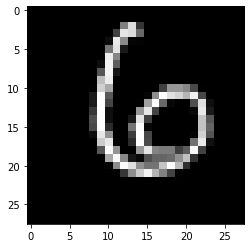

In [ ]:
# x is a data point with C*H*W shape
n=100
x= x_val[n]
y=y_val[n]
print(x.shape)
plt.imshow(x.numpy()[0],cmap="gray")

# we use unsqueeze to expand dimensions to 1*C*H*W
x= x.unsqueeze(0)

# convert to torch.float32
x=x.type(torch.float)

# get model output
output=_model(x)

# get predicted class
pred = output.argmax(dim=1, keepdim=True)
print (pred.item(),y.item())